https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C://Users//User//Desktop//PG_DA//ML//DATA/data_banknote_authentication.csv")

In [3]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.isna().sum()

Variance_Wavelet    0
Skewness_Wavelet    0
Curtosis_Wavelet    0
Image_Entropy       0
Class               0
dtype: int64

In [6]:
X = df.drop("Class", axis = 1)

In [7]:
y = df["Class"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
n_estimators=[64,100,128, 200]

In [13]:
max_features=[2,3,4]

In [14]:
bootstrap=[True, False]

In [15]:
oob_score=[True, False]

In [16]:
param_grid = {"n_estimators":n_estimators,
             "max_features":max_features,
             "bootstrap":bootstrap,
             "oob_score":oob_score}

In [17]:
rfc = RandomForestClassifier()

In [18]:
grid = GridSearchCV(rfc, param_grid)

In [19]:
grid.fit(X_train, y_train)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.wa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [20]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [25]:
rfc = RandomForestClassifier(max_features = 2, n_estimators= 64, oob_score= True)

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [27]:
rfc.oob_score_

0.9948542024013722

In [28]:
pred = rfc.predict(X_test)

In [29]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


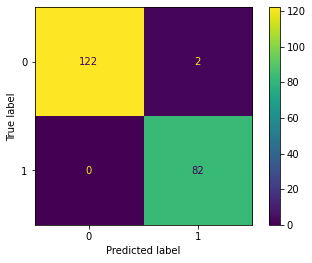

In [30]:
plot_confusion_matrix(rfc, X_test, y_test)

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



## Understanding Number of Estimators (Trees)

Let's plot out error vs. Number of Estimators

In [34]:
errors = []
misclassification = []

for n in range(1,64):
    rfc = RandomForestClassifier(n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    n_missed = np.sum(y_pred != y_test)
    
    errors.append(err)
    misclassification.append(n_missed)

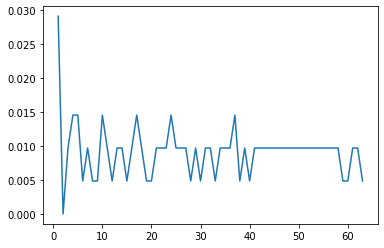

In [37]:
plt.plot(range(1,64),errors)

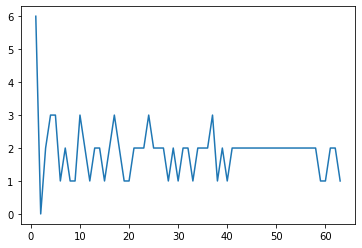

In [36]:
plt.plot(range(1,64), misclassification)